In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir():
    if file.endswith(".csv"):
        n += 1

print(n)

20


In [3]:
#Importo los promedios, que van a ser todos los .csv dividido dos (ya que hay el doble, porque las desviaciones están aparte)
data=[]
for i in range(int(n/2)):
    i=i+1
    data.append(pd.read_csv(f"promedio_{i}.csv"))

data=pd.concat(data)
#print(data)

In [12]:
#Armo el eje x, el tiempo, en escala de días
t1=np.array([0,0.5,0.75,1,1.25,1.75,1.875,2,2.125])
t2=2.125 + np.arange(0,21/4,0.25)

In [13]:
t=np.concatenate([t1,t2])

In [14]:
c1=np.array([data['promedio1']]) #Blanco
c2=np.array([data['promedio2']]) #Starch
c3=np.array([data['promedio3']]) #TPS
c4=np.array([data['promedio4']]) #TPS-NPTiO

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [18]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(h,C): #meter el área
    return F *C*h*60* 44 / (den)

#Se le introduce la cantidad de horas a la cual se va a proyectar (h) y la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [42]:
#Los primeros 5 los proyecto por 6 h
#El 6to, 7mo, 8vo, 9no los proyecto por 4 h

gramos1=np.concatenate(np.array([gramos(6,c1[0][0:5]),gramos(4,c1[0][5:])]))
gramos2=np.concatenate(np.array([gramos(6,c2[0][0:5]),gramos(4,c2[0][5:])]))
gramos3=np.concatenate(np.array([gramos(6,c3[0][0:5]),gramos(4,c3[0][5:])]))
gramos4=np.concatenate(np.array([gramos(6,c4[0][0:5]),gramos(4,c4[0][5:])]))

<ipython-input-42-22ada33ba429>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gramos1=np.concatenate(np.array([gramos(6,c1[0][0:5]),gramos(4,c1[0][5:])]))
<ipython-input-42-22ada33ba429>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gramos2=np.concatenate(np.array([gramos(6,c2[0][0:5]),gramos(4,c2[0][5:])]))
<ipython-input-42-22ada33ba429>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this

In [43]:
len(c1[0][0:])

30

In [44]:
gramos1_ac=np.add.accumulate(gramos1)
gramos2_ac=np.add.accumulate(gramos2)
gramos3_ac=np.add.accumulate(gramos3)
gramos4_ac=np.add.accumulate(gramos4)

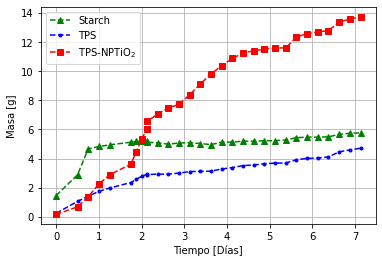

In [45]:
plt.plot(t,gramos2_ac-gramos1_ac,'^--',label='Starch',color='green')
plt.plot(t,gramos3_ac-gramos1_ac,'.--',label='TPS',color='blue')
plt.plot(t,gramos4_ac-gramos1_ac,'s--',label='TPS-NPTiO$_2$',color='red')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion-restado.png")
plt.show()